# Computer vision Introduction using CNN 
# (Convolutional Neural Network)
* CNN should have non linear activations
* tf.keras.layers.ConvXD where X:
  - 1 = 1D text based
  - 2 = 2D Images
  - 3 = 3D Videos


## Lets now get the data
We will only be using the pizza and steak part of the food101 dataset

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2021-09-06 18:45:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  35.3MB/s    in 3.0s    

2021-09-06 18:45:20 (35.3 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
# Time to unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

In [3]:
# View files
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


## Visualizing the Data

In [5]:
import os 

# Lets traverse through pizza steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  #print(f" There are {len(dirnames)} Directories and {len(filenames)} images in {dirpath}.")
  if len(dirnames) < 1:
    print(f"There are {len(filenames)} images in {dirpath}.")
  elif  len(filenames) <= 1:
    print(f"There are {len(dirnames)} Directories in {dirpath}.")

There are 2 Directories in pizza_steak.
There are 2 Directories in pizza_steak/train.
There are 750 images in pizza_steak/train/pizza.
There are 750 images in pizza_steak/train/steak.
There are 2 Directories in pizza_steak/test.
There are 250 images in pizza_steak/test/pizza.
There are 250 images in pizza_steak/test/steak.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
num_pizza_images_test

250

In [12]:
# Lets get the classnames 
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))

class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

### Visualize our images

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  """
  INFO:Gets a random image from a selected directory and class
  """
  target_folder = target_dir + "/" +  target_class
  random_image = random.sample(os.listdir(target_folder),1)
  # Plot out the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f" Image shape: {img.shape}") # Shows the shape of the image

 return img

 Image shape: (512, 382, 3)


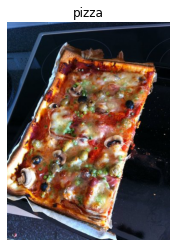

In [23]:
# View a random image
img = view_random_image(target_dir = "pizza_steak/train",
                        target_class = "pizza")